<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_Outsiders/blob/main/2024_02_27_Gino_Meeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install Spacy
! pip install spacy-llm
! python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load('en_core_web_lg')

list_life_science = [
"Genomics & Systems Biology", "Developmental Genetics and Stem Cells", "Molecular & Cellular Biology",
"Computational Biology", "Infectious Diseases and the Microbiome", "Evolution, Ecology & Environmental Biology",
"Plant Genomics", "Finance", "Organizational Behavior", "Music", "Art History"]

for life_science in list_life_science:
  w1 = nlp("Music")[0]
  w2 = nlp(life_science)
  similarity_score = round(w1.similarity(w2), 3)
  print(f'The similarity between "{w1}" and "{w2}" is {similarity_score}')

The similarity between "Music" and "Genomics & Systems Biology" is 0.368
The similarity between "Music" and "Developmental Genetics and Stem Cells" is 0.181
The similarity between "Music" and "Molecular & Cellular Biology" is 0.358
The similarity between "Music" and "Computational Biology" is 0.292
The similarity between "Music" and "Infectious Diseases and the Microbiome" is 0.104
The similarity between "Music" and "Evolution, Ecology & Environmental Biology" is 0.344
The similarity between "Music" and "Plant Genomics" is 0.27
The similarity between "Music" and "Finance" is 0.245
The similarity between "Music" and "Organizational Behavior" is 0.191
The similarity between "Music" and "Music" is 1.0
The similarity between "Music" and "Art History" is 0.562


In [ ]:
import spacy

# Load the large English model
nlp = spacy.load('en_core_web_lg')

# Get the vector for "King"
king = nlp.vocab['Biology']

# Calculate similarities and track the top 5
similar_words = sorted(nlp.vocab, key=lambda w: king.similarity(w), reverse=True)

# Filter out words without vectors and the original word "King", then take the top 5
top_5_similar_words = [w.text for w in similar_words if w.has_vector and w.text.lower() != "Biology"][:5]

print(top_5_similar_words)


['Biology', 'Ph.D.', 'Prof.', 'Prof', 'Ph']


<ipython-input-29-5345fce9e312>:10: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  similar_words = sorted(nlp.vocab, key=lambda w: king.similarity(w), reverse=True)


In [ ]:
doc1 = nlp("dog")

vector = doc1[0].vector

vector.shape

(300,)

# Columbia University

In [ ]:
import pandas as pd

df_columbia = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Joy_Outsiders/main/2024-02_Columbia_Prof_Outisders.csv')

df_c = df_columbia[["Current", "Name", "Rank", "Citation", "Department", "PhD_School", "PhD_Major", "BA_School", "BA_Country"]]

df_c = df_c.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [ ]:
df_c_1 = df_c.dropna(subset=["PhD_Major"])

In [ ]:
df_c_1.loc[df_c_1["Department"] == "Dean's Office", "Department"] = "Decision, Risk, and Operations"

In [ ]:
df_c_1["Department"] = df_c_1["Department"].str.replace("Division", "")

<ipython-input-39-910a15614e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_1["Department"] = df_c_1["Department"].str.replace("Division", "")


In [ ]:
df_c_1.head()

,Current,Name,Rank,Citation,Department,PhD_School,PhD_Major,BA_School,BA_Country
0,Columbia,Mabel Abraham,Associate,471.0,Management,MIT,Management,Providence College,USA
1,Columbia,Eric Abrahamson,Full,21255.0,Management,NYU,Management,Haverford College,USA
2,Columbia,Modupe Akinola,Full,4097.0,Management,Harvard,Orgnizational Behavior,Harvard,USA
3,Columbia,Daniel Ames,Full,NaN,Management,Berkeley,Social and Personality Psychology,Beloit College,USA
4,Columbia,Joel Brockner,Full,34632.0,Management,Tufts,Personality and social psychology,SUNY,UAS


In [ ]:
df_c_1[df_c_1["PhD_Major"].str.contains("Sociology")]

,Current,Name,Rank,Citation,Department,PhD_School,PhD_Major,BA_School,BA_Country
12,Columbia,E. Tory Higgins,Full,124939.0,Management,McGill University,Sociology and Anthropology,Columbia,USA
26,Columbia,Dan Wang,Associate,2095.0,Management,Stanford,Sociology,Columbia,USA


In [ ]:
import spacy

# Load SpaCy model: en_core_web_lg or _sm
nlp = spacy.load('en_core_web_lg')  # or any other model

# Vectorize texts and calculate similarity
# Here, we directly use SpaCy's similarity method, which averages word vectors for text
df_c_1['Similarity_SpaCy'] = df_c_1.apply(lambda row: nlp(str(row['Department'])).similarity(nlp(str(row['PhD_Major']))), axis=1)

<ipython-input-42-54e52ad2543a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_1['Similarity_SpaCy'] = df_c_1.apply(lambda row: nlp(str(row['Department'])).similarity(nlp(str(row['PhD_Major']))), axis=1)


In [ ]:
df_c_1.sort_values("Similarity_SpaCy")

,Current,Name,Rank,Citation,Department,PhD_School,PhD_Major,BA_School,BA_Country,Similarity_SpaCy
39,Columbia,Hongyao Ma,Assistant,339.0,"Decision, Risk, and Operations",Harvard,Computer Science,Xian Jiaotong University,China,0.464229
2,Columbia,Modupe Akinola,Full,4097.0,Management,Harvard,Orgnizational Behavior,Harvard,USA,0.503635
13,Columbia,Paul Ingram,Full,21384.0,Management,Cornell,Orgnizational Behavior,Brock University,Canada,0.503635
35,Columbia,Paul Glasserman,Full,NaN,"Decision, Risk, and Operations",Harvard,Applied Mathematics,Princeton,USA,0.529393
67,Columbia,Thomas Bourveau,Associate,880.0,Accounting,HEC Paris,Maangemetn Science,University Paris 1 - Sorbonne,France,0.533497
...,...,...,...,...,...,...,...,...,...,...
74,Columbia,Lisa Liu,Assistant,497.0,Accounting,Chicago,Accounting,Renmin University of China,China,1.000000
75,Columbia,Doron Nissim,Full,7441.0,Accounting,Berkeley,Accounting,University of Haifa,Israel,1.000000
76,Columbia,Shivaram Rajgopal,Full,28536.0,Accounting,University of Iowa,Accounting,University of Bombay,India,1.000000
78,Columbia,Sang Wu,Assistant,NaN,Accounting,CMU,Accounting,University of Hong Kong,China,1.000000


In [ ]:
df_c_2 = df_c_1.dropna(subset=["Citation"])

In [ ]:
df_c_2[df_c_2["PhD_Major"].str.contains("Computer")]

,Current,Name,Rank,Citation,Department,PhD_School,PhD_Major,BA_School,BA_Country,Similarity_SpaCy
39,Columbia,Hongyao Ma,Assistant,339.0,"Decision, Risk, and Operations",Harvard,Computer Science,Xian Jiaotong University,China,0.464229


In [ ]:
df_c_2["Similarity_SpaCy"].mean()

0.7779360325906317

In [ ]:
import numpy as np

df_c_2["Group"] = np.where(df_c_2["Similarity_SpaCy"] > df_c_2["Similarity_SpaCy"].mean(), "Insider", "Outsider")

<ipython-input-47-30d6dd665a40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_2["Group"] = np.where(df_c_2["Similarity_SpaCy"] > df_c_2["Similarity_SpaCy"].mean(), "Insider", "Outsider")


In [ ]:
df_c_2.groupby("Group")["Citation"].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Insider,36.0,4450.805556,6277.385815,22.0,385.75,1485.5,5981.5,28536.0
Outsider,46.0,13665.695652,23000.557502,24.0,1825.25,4066.0,14089.5,124939.0


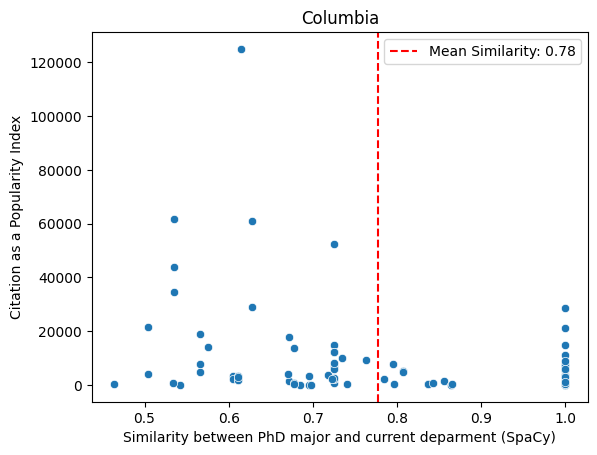

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_c_2, x="Similarity_SpaCy", y="Citation")

plt.title("Columbia")
plt.xlabel("Similarity between PhD major and current deparment (SpaCy)")
plt.ylabel("Citation as a Popularity Index")

mean_similarity = df_c_2['Similarity_SpaCy'].mean()
plt.axvline(x=mean_similarity, color='r', linestyle='--', label=f'Mean Similarity: {mean_similarity:.2f}')
plt.legend()

plt.savefig("Major Similarity and Citations.png")

plt.show()

T-statistic: -2.5965002664055072, P-value: 0.012141968134860352


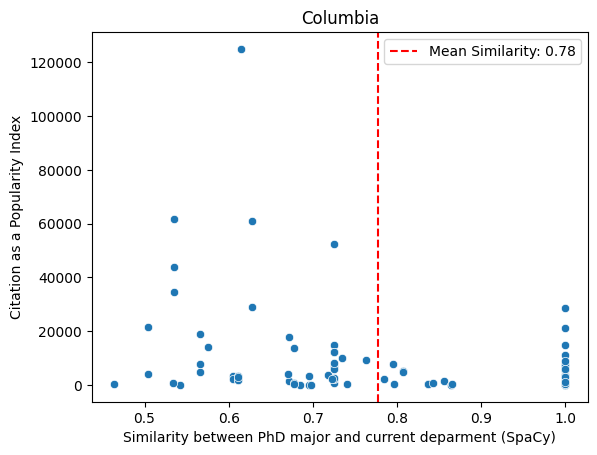

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

group1 = df_c_2[df_c_2["Group"]=="Insider"]["Citation"].dropna()
group2 = df_c_2[df_c_2["Group"]=="Outsider"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_c_2, x="Similarity_SpaCy", y="Citation")

plt.title("Columbia")
plt.xlabel("Similarity between PhD major and current deparment (SpaCy)")
plt.ylabel("Citation as a Popularity Index")

mean_similarity = df_c_2['Similarity_SpaCy'].mean()
plt.axvline(x=mean_similarity, color='r', linestyle='--', label=f'Mean Similarity: {mean_similarity:.2f}')
plt.legend()

plt.savefig("Major Similarity and Citations.png")

plt.show()

<ipython-input-51-47b5340aa056>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c_2["USA or Not"] = np.where(df_c_2["BA_Country"] == "USA", "USA", "Non_USA")


T-statistic: 0.817453626476392, P-value: 0.4172133586555965




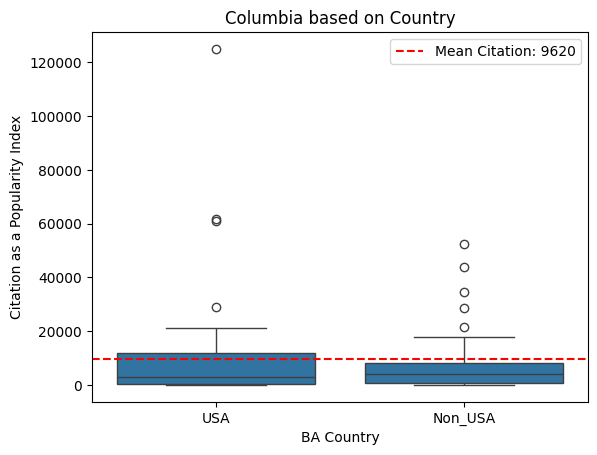

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

df_c_2["USA or Not"] = np.where(df_c_2["BA_Country"] == "USA", "USA", "Non_USA")

group1 = df_c_2[df_c_2["USA or Not"]=="USA"]["Citation"].dropna()
group2 = df_c_2[df_c_2["USA or Not"]=="Non_USA"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
print("\n")

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_c_2, x="USA or Not", y="Citation")

plt.title("Columbia based on Country")
plt.xlabel("BA Country")
plt.ylabel("Citation as a Popularity Index")

means = df_c_2['Citation'].mean()
plt.axhline(y=means, color='r', linestyle='--', label=f'Mean Citation: {means:.0f}')
plt.legend()


plt.savefig("Citations based on Country.png")

plt.show()

In [ ]:
df_c_2.groupby("USA or Not")["Citation"].describe()

,count,mean,std,min,25%,50%,75%,max
USA or Not,,,,,,,,
Non_USA,43.0,8003.511628,11751.000884,43.0,852.5,4035.0,8061.0,52296.0
USA,39.0,11402.564103,23432.043086,22.0,446.0,2943.0,11742.0,124939.0


In [ ]:

phd_school_counts = df_c_2["PhD_School"].value_counts().reset_index().head(10)

phd_school_counts.columns = ['PhD_School', 'Graduate_Count']

phd_school_counts

,PhD_School,Graduate_Count
0,Stanford,16
1,Harvard,10
2,NYU,6
3,MIT,5
4,Chicago,5
5,UPENN,4
6,Berkeley,3
7,Cornell,3
8,Columbia,2
9,CMU,2


In [ ]:
len(df_c_2["PhD_School"].unique())

33

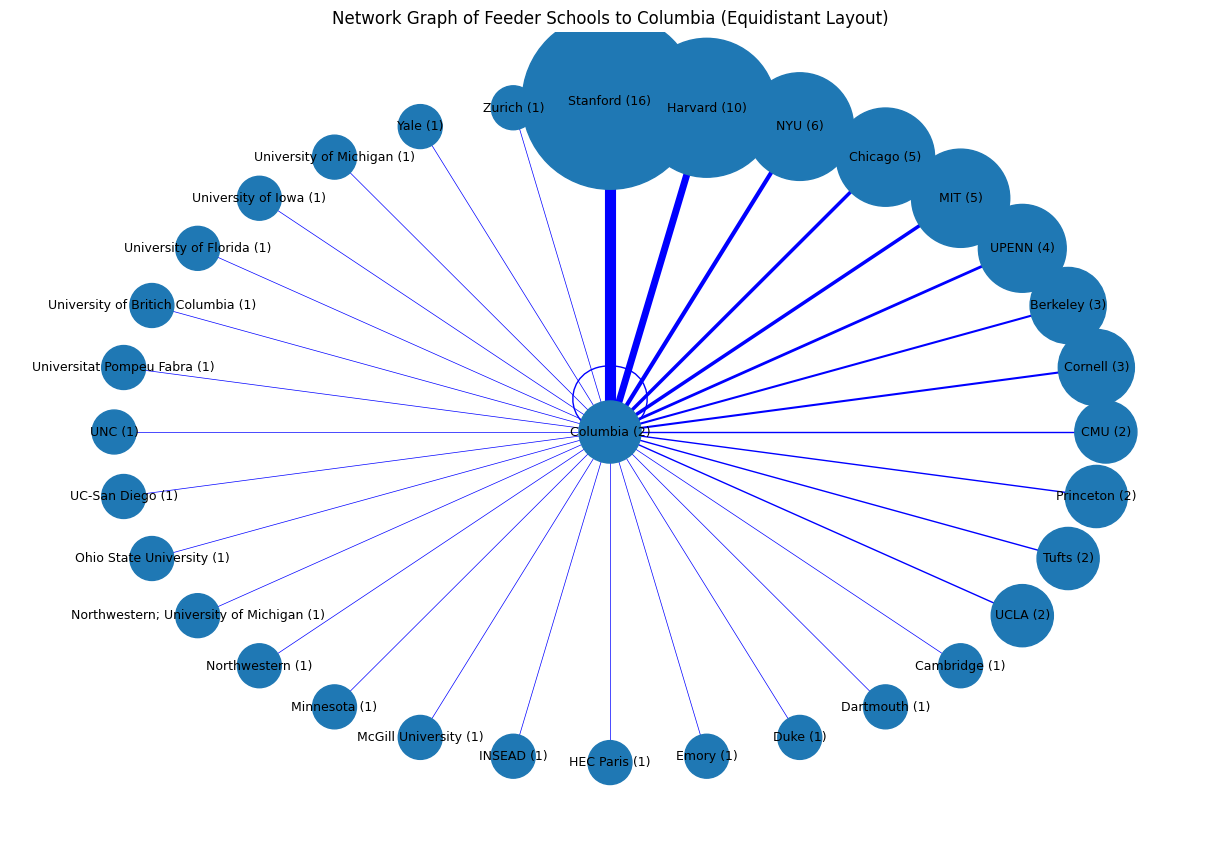

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Convert the series to a DataFrame for easier manipulation
school_counts = df_c_2['PhD_School'].value_counts()
top_schools_df = school_counts.reset_index()
top_schools_df.columns = ['School', 'Graduates']

# Calculate the Columbia to Columbia graduates count (already done in your code)
columbia_to_columbia_count = df_c_2[df_c_2['PhD_School'] == 'Columbia'].shape[0]

# Create a new graph
G = nx.Graph()

# Add a node for Columbia with a size based on the Columbia to Columbia count
columbia_label = f"Columbia ({columbia_to_columbia_count})"
G.add_node(columbia_label, size=columbia_to_columbia_count*10, label=columbia_label)

# Add nodes for each of the top schools and edges to Columbia
for index, row in top_schools_df.iterrows():
    custom_label = f"{row['School']} ({row['Graduates']})"
    G.add_node(custom_label, size=row['Graduates']*10, label=custom_label)
    G.add_edge(columbia_label, custom_label, weight=row['Graduates'])

# Sort nodes based on the number of graduates and alphabetically for ties
sorted_nodes = sorted([(node, data['size']) for node, data in G.nodes(data=True) if node != columbia_label],
                      key=lambda x: (-x[1], x[0]))

# Set a constant radius for all nodes from the central node
radius = 2.0  # Adjust as needed for visualization

# Calculate custom positions with equal distance from Columbia
pos = {columbia_label: (0, 0)}  # Columbia at the center
angle_increment = 2 * np.pi / len(sorted_nodes)  # Evenly distribute nodes around the circle
angle = np.pi / 2  # Start from the top (90 degrees)

for node, _ in sorted_nodes:
    pos[node] = (np.cos(angle) * radius, np.sin(angle) * radius)
    angle -= angle_increment  # Move counter-clockwise

# Draw the graph with custom positions
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=[data['size']*100 for node, data in G.nodes(data=True)],
        width=[G[u][v]['weight']/2 for u, v in G.edges], edge_color='blue', labels=nx.get_node_attributes(G, 'label'), font_size=9)
plt.title("Network Graph of Feeder Schools to Columbia (Equidistant Layout)")

plt.show()

# Stanford

In [ ]:
import pandas as pd

df_stanford = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Joy_Outsiders/main/2024-02_Stanford_Prof_Outisders.csv', encoding='latin1')

df_s = df_stanford[["Current", "Name", "Rank", "Citation", "Department", "PhD_School", "PhD_Major", "BA_School", "BA_Country"]]

df_s["PhD_School"] = df_s["PhD_School"].str.strip()

df_s = df_s.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [ ]:
df_s_1 = df_s.dropna(subset=["PhD_Major"])

import spacy

# Load SpaCy model: en_core_web_lg or _sm
nlp = spacy.load('en_core_web_lg')  # or any other model

# Vectorize texts and calculate similarity
# Here, we directly use SpaCy's similarity method, which averages word vectors for text
df_s_1['Similarity_SpaCy'] = df_s_1.apply(lambda row: nlp(str(row['Department'])).similarity(nlp(str(row['PhD_Major']))), axis=1)

In [ ]:
df_s_1.sort_values("Similarity_SpaCy")

In [ ]:
df_s_2 = df_s_1.dropna(subset=["Citation"])

print(df_s_2["Similarity_SpaCy"].mean())

df_s_2["Group"] = np.where(df_s_2["Similarity_SpaCy"] > df_s_2["Similarity_SpaCy"].mean(), "Insider", "Outsider")

In [ ]:
df_s_2.groupby("Group")["Citation"].describe()

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

group1 = df_s_2[df_s_2["Group"]=="Insider"]["Citation"].dropna()
group2 = df_s_2[df_s_2["Group"]=="Outsider"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_s_2, x="Similarity_SpaCy", y="Citation")

plt.title("Stanford")
plt.xlabel("Similarity between PhD major and current deparment (SpaCy)")
plt.ylabel("Citation as a Popularity Index")

mean_similarity = df_s_2['Similarity_SpaCy'].mean()
plt.axvline(x=mean_similarity, color='r', linestyle='--', label=f'Mean Similarity: {mean_similarity:.2f}')
plt.legend()

plt.savefig("Major Similarity and Citations.png")

plt.show()

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

df_s_2["USA or Not"] = np.where(df_s_2["BA_Country"] == "USA", "USA", "Non_USA")

group1 = df_s_2[df_s_2["USA or Not"]=="USA"]["Citation"].dropna()
group2 = df_s_2[df_s_2["USA or Not"]=="Non_USA"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
print("\n")

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_s_2, x="USA or Not", y="Citation")

plt.title("Stanford based on Country")
plt.xlabel("BA Country")
plt.ylabel("Citation as a Popularity Index")

means = df_s_2['Citation'].mean()
plt.axhline(y=means, color='r', linestyle='--', label=f'Mean Citation: {means:.0f}')
plt.legend()


plt.savefig("Citations based on Country.png")

plt.show()

In [ ]:
df_s_2.groupby("USA or Not")["Citation"].describe()

In [ ]:
df_s_2[df_s_2["USA or Not"] == "Non_USA"].sort_values("Citation", ascending=False)

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Convert the series to a DataFrame for easier manipulation
school_counts = df_s_2['PhD_School'].value_counts()
top_schools_df = school_counts.reset_index()
top_schools_df.columns = ['School', 'Graduates']

# Calculate the stanford to stanford graduates count (already done in your code)
stanford_to_stanford_count = df_s_2[df_s_2['PhD_School'] == 'Stanford'].shape[0]

# Create a new graph
G = nx.Graph()

# Add a node for Columbia with a size based on the Columbia to Columbia count
columbia_label = f"Stanford ({stanford_to_stanford_count})"
G.add_node(columbia_label, size=stanford_to_stanford_count*10, label=columbia_label)

# Add nodes for each of the top schools and edges to Columbia
for index, row in top_schools_df.iterrows():
    custom_label = f"{row['School']} ({row['Graduates']})"
    G.add_node(custom_label, size=row['Graduates']*10, label=custom_label)
    G.add_edge(columbia_label, custom_label, weight=row['Graduates'])

# Sort nodes based on the number of graduates and alphabetically for ties
sorted_nodes = sorted([(node, data['size']) for node, data in G.nodes(data=True) if node != columbia_label],
                      key=lambda x: (-x[1], x[0]))

# Set a constant radius for all nodes from the central node
radius = 2.0  # Adjust as needed for visualization

# Calculate custom positions with equal distance from Columbia
pos = {columbia_label: (0, 0)}  # Columbia at the center
angle_increment = 2 * np.pi / len(sorted_nodes)  # Evenly distribute nodes around the circle
angle = np.pi / 2  # Start from the top (90 degrees)

for node, _ in sorted_nodes:
    pos[node] = (np.cos(angle) * radius, np.sin(angle) * radius)
    angle -= angle_increment  # Move counter-clockwise

# Draw the graph with custom positions
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=[data['size']*100 for node, data in G.nodes(data=True)],
        width=[G[u][v]['weight']/2 for u, v in G.edges], edge_color='blue', labels=nx.get_node_attributes(G, 'label'), font_size=9)
plt.title("Network Graph of Feeder Schools to Stanford (Equidistant Layout)")

plt.show()

In [ ]:
len(df_s_2["PhD_School"].unique())

In [ ]:
phd_school_counts = df_s_2["PhD_School"].value_counts().reset_index().head(10)

phd_school_counts.columns = ['PhD_School', 'Graduate_Count']

phd_school_counts.reset_index()

# Concatenate the dataset

In [ ]:
df_temp = pd.concat([df_c_2, df_s_2], ignore_index=True)

df_temp

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

group1 = df_temp[df_temp["Current"]=="Columbia"]["Citation"].dropna()
group2 = df_temp[df_temp["Current"]=="Stanford"]["Citation"].dropna()


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

df_temp.groupby("Current")["Citation"].describe()

In [ ]:
import seaborn as sns

sns.histplot(data=df_temp, hue="Current", x="Citation", alpha=0.5, bins=10)

plt.title("Citation by University")
plt.xlabel("Number of Citation")
plt.show()

In [ ]:
df_temp[(df_temp["Current"] == "Stanford") & (df_temp["PhD_School"] == "Stanford")]